In [2]:
#1
from sklearn import datasets
import matplotlib.pyplot as plt
digits= datasets.load_digits()
from sklearn.model_selection import train_test_split
import numpy as np
X=digits.data
y=digits.target
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
#1.1
from sklearn import neighbors
#neighbors.KNeighborsClassifier(n_neighbors=6,weights='uniform',algorithm='auto',leaf_size=1,p=2, metric='minkowski',metric_params=None, n-jobs=1)
knn=neighbors.KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
s6=knn.score(X_test,y_test)
s6


0.9722222222222222

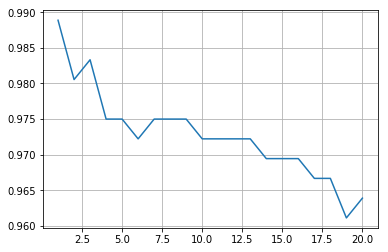

In [6]:
def score(n):
  k=neighbors.KNeighborsClassifier(n_neighbors=n)
  k.fit(X_train,y_train)
  s=k.score(X_test,y_test)
  return s

sk=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
sq=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for k in sq :
    sk[k-1]=score(k)
sk
x=range(len(sq))
plt.plot(sq,sk)
plt.grid()

In [4]:
#1.2
#From the result of 1.1, when k=1, the biggest accuracy can be obtained. As k becomes biggger, the accuracy decrease slightly. From the plot above we can get k=1 is underfitting and when k>=7 is overfitting. Because when k=1, the number of neighbors is too small and k>=7 the number of neighbors is too large, the accuracy begins to drop. 

In [40]:
#2 the accuracy scores and the confusion matrix using different kernels
from sklearn import svm
clfl = svm.SVC(kernel='linear')
clfl.fit(X_train, y_train)
scol=clfl.score(X_test,y_test)
scol

0.9736842105263158

In [29]:
from sklearn.metrics import confusion_matrix
y_predl = clfl.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test,y_predl)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [37]:
clfp = svm.SVC(kernel='poly')
clfp.fit(X_train, y_train)
scop=clfp.score(X_test,y_test)
scop

0.9473684210526315

In [41]:
from sklearn.metrics import confusion_matrix
y_predp = clfp.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test,y_predp)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  1,  8]], dtype=int64)

In [42]:
clfr = svm.SVC(kernel='rbf')
clfr.fit(X_train, y_train)
scor=clfr.score(X_test,y_test)
scor

0.9736842105263158

In [44]:
from sklearn.metrics import confusion_matrix
y_predr = clfr.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test,y_predr)
#From the results we can see linear and rbf kernels are the best since they have the highest accuracy scores and the best confusion matrix.

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [46]:
#3
from sklearn.naive_bayes import GaussianNB
# create naive bayes classifier
gaunb = GaussianNB()
 
# train classifier with dataset
gaunb = gaunb.fit(X_train, y_train)
scog=gaunb.score(X_test,y_test)
scog
 

1.0

In [48]:
# predict using classifier
prediction = gaunb.predict(X_test)
confusion_matrix(y_test,prediction)
#For the zero conditional probability, we have to re‐estimate class conditional probabilities.

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]], dtype=int64)

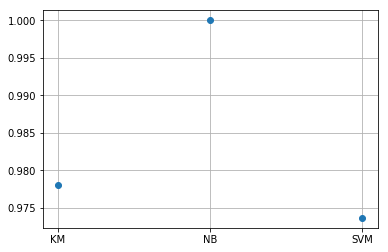

In [61]:
#4.1
acKM=np.mean(sk[0:8])
acSVM=scol
acNB=scog
ac=[acKM,acSVM,acNB]
x=['KM','SVM','NB']
plt.plot(x,ac,'.',MarkerSize=12)
plt.grid()

In [62]:
#4.2
#It's hard to find data samples which meet the given requirements. But one possible reason for these is overfitting or underfitting. As for all the classifiers predict differently from each other, it may because the algorithm of classifiers are different from each other.

In [66]:
#Regression 1
import pandas as pd
data=pd.read_csv('data/Advertising.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [72]:
#create a python list of feature names   
X = data[['TV', 'radio', 'newspaper']]  
# print the first 5 rows  
X.head()  

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [75]:
# select a Series from the DataFrame  
y = data['sales']  
# equivalent command that works if there are no spaces in the column name  
y = data.sales  
# print the first 5 values  
y.head() 

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [84]:
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)  
from sklearn.linear_model import LinearRegression  
linreg = LinearRegression()  
model=linreg.fit(X_train, y_train)  
linreg.intercept_ 

2.8769666223179318

In [87]:
feature_cols,linreg.coef_

(['TV', 'radio', 'newspaper'], array([0.05, 0.18, 0.  ]))

In [88]:
y_pred = linreg.predict(X_test)  
y_pred  

array([21.71, 16.41,  7.61, 17.81, 18.61, 23.84, 16.32, 13.43,  9.17,
       17.33, 14.44,  9.84, 17.19, 16.73, 15.06, 15.61, 12.43, 17.18,
       11.09, 18.01,  9.28, 12.98,  8.8 , 10.42, 11.38, 14.98,  9.79,
       19.4 , 18.18, 17.13, 21.55, 14.7 , 16.25, 12.32, 19.92, 15.32,
       13.89, 10.03, 20.93,  7.45,  3.65,  7.22,  6.  , 18.43,  8.39,
       14.08, 15.02, 20.36, 20.57, 19.61])

In [89]:
#2
data=pd.read_csv('data/gm_2008_region.csv')
data.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059,2.73,0.1,3.328945,24.59620,12314,129.9049,75.3,29.5,Middle East & North Africa
1,19842251,6.43,2.0,1.474353,22.25083,7103,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860,2.24,0.5,4.785170,27.50170,14646,118.8915,75.5,15.4,America
3,2975029,1.40,0.1,1.804106,25.35542,7383,132.8108,72.5,20.0,Europe & Central Asia
4,21370348,1.96,0.1,18.016313,27.56373,41312,117.3755,81.5,5.2,East Asia & Pacific


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null int64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null int64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(7), int64(2), object(1)
memory usage: 10.4+ KB


In [91]:
data.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


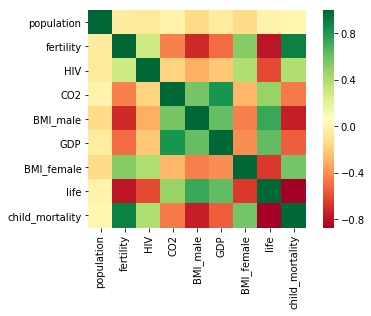

In [94]:
import seaborn as sns
sns.heatmap(data.corr(),square=True, cmap='RdYlGn')

Text(0,0.5,'life')

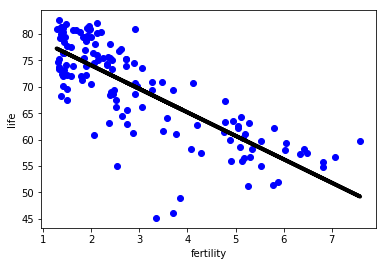

In [125]:
from sklearn import linear_model 
regr1 = linear_model.LinearRegression()  
regr1.fit(data.fertility.values.reshape(-1, 1), data.life.values.reshape(-1, 1))  
plt.scatter(data.fertility.values.reshape(-1, 1), data.life.values.reshape(-1, 1),color='blue')  
plt.plot(data.fertility.values.reshape(-1, 1), regr1.predict(data.fertility.values.reshape(-1, 1)),color='black',linewidth=4) 
plt.xlabel("fertility")  
plt.ylabel('life')  

In [116]:
X = data[['population','fertility', 'HIV', 'CO2' ,'BMI_male','GDP','BMI_female','child_mortality']]  
y=data['life']
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)  
model=linreg.fit(X_train, y_train)  
linreg.intercept_ 

90.61563223139837

In [117]:
feature_cols,linreg.coef_

(['TV', 'radio', 'newspaper'],
 array([ 8.22e-09, -6.33e-01, -7.16e-01, -2.14e-01,  4.04e-01,  1.37e-04,
        -2.01e-01, -8.42e-02]))

In [118]:
y_pred = linreg.predict(X_test)  
y_pred  

array([78.15, 76.9 , 77.95, 74.15, 79.16, 71.81, 75.88, 57.51, 71.86,
       83.87, 56.44, 69.5 , 76.92, 76.62, 61.06, 56.87, 73.21, 64.51,
       73.14, 54.93, 72.85, 75.56, 79.78, 75.86, 76.27, 74.09, 64.96,
       75.06, 74.07, 54.06, 49.1 , 70.32, 78.35, 73.41, 75.09])

In [122]:
#score in step 2
regr1.score(data.fertility.values.reshape(-1,1),data.life.values.reshape(-1,1))

0.6192442167740038

In [126]:
#score in step 3
model.score(X_test,y_test)
#From the result we can see the score in step 3 is higher than step 2.

0.743922223791101

In [136]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
lr = linear_model.LinearRegression()
cross_val_score(model, X, y,cv=5)
#After apply 5-fold cross-validation, the accuracy of model increase significantly

array([0.82, 0.83, 0.9 , 0.81, 0.94])

In [138]:
#Review questions 
#1
df1=pd.read_csv('data-review/got_data_1.csv')
df1.head()

,id,name,familyname,dob,gender,income,age
0,a,cersei,lannister,01-01-1975,f,8000,43
1,b,daenerys,targaryen,01-02-1980,f,6000,38
2,c,jon,snow,01-03-1970,m,7000,48
3,d,arya,stark,01-04-2000,f,6500,18
4,e,sansa,stark,01-05-1990,f,5500,28


In [139]:
df2=pd.read_csv('data-review/got_data_2.csv')
df2.head()

,id,fullname,dob,gender,age,income
0,1,eddard stark,1965-12-01,0,53.0,100000
1,2,petyr baelish,NaN,0,NaN,85000
2,1,jaime lannister,1975-12-08,0,43.0,90000
3,3,margaery tyrell,1995-31-31,1,23.0,105000
4,4,ramsay bolton,1985-10-12,1,33.0,92000


In [142]:
#read attributes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
id            10 non-null object
name          10 non-null object
familyname    8 non-null object
dob           10 non-null object
gender        10 non-null object
income        10 non-null int64
age           10 non-null int64
dtypes: int64(2), object(5)
memory usage: 400.0+ bytes


In [143]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
id          10 non-null int64
fullname    10 non-null object
dob         8 non-null object
gender      10 non-null int64
age         7 non-null float64
income      10 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 440.0+ bytes


In [144]:
# Problems in data sets
#In dataset1, the name and family name are redudant, can be combined.ID is named in alphabet sequence, and the fomat of dob is different from dataset 2.
#In dataset2, there are some missing data in dob and age.
#All these problems may cause some obstruction in future data analytics.

In [ ]:
#Clean datasets
import pandas as pd
import numpy as np
df1['fullname'] = df1['name'] +' '+df1['familyname']
df1.drop(['name','familyname'],axis=1,inplace=True)

In [163]:
df1.fillna(value='UNKNOWN')

,dob,gender,income,age,fullname
0,01-01-1975,f,8000,43,cersei lannister
1,01-02-1980,f,6000,38,daenerys targaryen
2,01-03-1970,m,7000,48,jon snow
3,01-04-2000,f,6500,18,arya stark
4,01-05-1990,f,5500,28,sansa stark
5,10-10-1985,f,7500,33,UNKNOWN
6,12-12-1980,m,8500,38,tyrion lannister
7,15-07-1998,m,10000,20,joffrey baratheon
8,31-01-1985,m,9000,33,UNKNOWN
9,30-03-1990,m,9500,28,theon greyjoy


In [159]:
df1.drop(['id'],axis=1,inplace=True)

In [164]:
df1

,dob,gender,income,age,fullname
0,01-01-1975,f,8000,43,cersei lannister
1,01-02-1980,f,6000,38,daenerys targaryen
2,01-03-1970,m,7000,48,jon snow
3,01-04-2000,f,6500,18,arya stark
4,01-05-1990,f,5500,28,sansa stark
5,10-10-1985,f,7500,33,UNKNOWN
6,12-12-1980,m,8500,38,tyrion lannister
7,15-07-1998,m,10000,20,joffrey baratheon
8,31-01-1985,m,9000,33,UNKNOWN
9,30-03-1990,m,9500,28,theon greyjoy


In [166]:
df2.drop(['id'],axis=1,inplace=True)

In [167]:
df2

,fullname,dob,gender,age,income
0,eddard stark,1965-12-01,0,53.0,100000
1,petyr baelish,NaN,0,NaN,85000
2,jaime lannister,1975-12-08,0,43.0,90000
3,margaery tyrell,1995-31-31,1,23.0,105000
4,ramsay bolton,1985-10-12,1,33.0,92000
5,brienne of-tarth,12345678,2,NaN,73000
6,khal drogo,1975-30-03,0,43.0,84000
7,ygritte,1990-02-02,1,28.0,95000
8,shae,NaN,1,NaN,150000
9,stannis baratheon,1970-66-66,0,48.0,110000


In [168]:
df2.fillna(value='UNKNOWN',inplace=True)
df2

,fullname,dob,gender,age,income
0,eddard stark,1965-12-01,0,53,100000
1,petyr baelish,UNKNOWN,0,UNKNOWN,85000
2,jaime lannister,1975-12-08,0,43,90000
3,margaery tyrell,1995-31-31,1,23,105000
4,ramsay bolton,1985-10-12,1,33,92000
5,brienne of-tarth,12345678,2,UNKNOWN,73000
6,khal drogo,1975-30-03,0,43,84000
7,ygritte,1990-02-02,1,28,95000
8,shae,UNKNOWN,1,UNKNOWN,150000
9,stannis baratheon,1970-66-66,0,48,110000


In [171]:
df2.replace(['1995-31-31','12345678','2','1975-30-03','1970-66-66',],'UNKNOWN',inplace=True)

In [173]:
df2.replace(2,'UNKNOWN',inplace=True)

In [174]:
df2

,fullname,dob,gender,age,income
0,eddard stark,1965-12-01,0,53,100000
1,petyr baelish,UNKNOWN,0,UNKNOWN,85000
2,jaime lannister,1975-12-08,0,43,90000
3,margaery tyrell,UNKNOWN,1,23,105000
4,ramsay bolton,1985-10-12,1,33,92000
5,brienne of-tarth,UNKNOWN,UNKNOWN,UNKNOWN,73000
6,khal drogo,UNKNOWN,0,43,84000
7,ygritte,1990-02-02,1,28,95000
8,shae,UNKNOWN,1,UNKNOWN,150000
9,stannis baratheon,UNKNOWN,0,48,110000


In [178]:
df1['dob']=pd.to_datetime(df1['dob'])

In [179]:
df1

,dob,gender,income,age,fullname
0,1975-01-01,f,8000,43,cersei lannister
1,1980-01-02,f,6000,38,daenerys targaryen
2,1970-01-03,m,7000,48,jon snow
3,2000-01-04,f,6500,18,arya stark
4,1990-01-05,f,5500,28,sansa stark
5,1985-10-10,f,7500,33,UNKNOWN
6,1980-12-12,m,8500,38,tyrion lannister
7,1998-07-15,m,10000,20,joffrey baratheon
8,1985-01-31,m,9000,33,UNKNOWN
9,1990-03-30,m,9500,28,theon greyjoy


In [180]:
df2.replace(0,'m',inplace=True)
df2.replace(1,'f',inplace=True)

In [181]:
df2

,fullname,dob,gender,age,income
0,eddard stark,1965-12-01,m,53,100000
1,petyr baelish,UNKNOWN,m,UNKNOWN,85000
2,jaime lannister,1975-12-08,m,43,90000
3,margaery tyrell,UNKNOWN,f,23,105000
4,ramsay bolton,1985-10-12,f,33,92000
5,brienne of-tarth,UNKNOWN,UNKNOWN,UNKNOWN,73000
6,khal drogo,UNKNOWN,m,43,84000
7,ygritte,1990-02-02,f,28,95000
8,shae,UNKNOWN,f,UNKNOWN,150000
9,stannis baratheon,UNKNOWN,m,48,110000


In [182]:
df2['income']=df2['income']/12
df2

,fullname,dob,gender,age,income
0,eddard stark,1965-12-01,m,53,8333.333333
1,petyr baelish,UNKNOWN,m,UNKNOWN,7083.333333
2,jaime lannister,1975-12-08,m,43,7500.000000
3,margaery tyrell,UNKNOWN,f,23,8750.000000
4,ramsay bolton,1985-10-12,f,33,7666.666667
5,brienne of-tarth,UNKNOWN,UNKNOWN,UNKNOWN,6083.333333
6,khal drogo,UNKNOWN,m,43,7000.000000
7,ygritte,1990-02-02,f,28,7916.666667
8,shae,UNKNOWN,f,UNKNOWN,12500.000000
9,stannis baratheon,UNKNOWN,m,48,9166.666667


In [183]:
pd.concat([df1,df2])

,age,dob,fullname,gender,income
0,43,1975-01-01 00:00:00,cersei lannister,f,8000.000000
1,38,1980-01-02 00:00:00,daenerys targaryen,f,6000.000000
2,48,1970-01-03 00:00:00,jon snow,m,7000.000000
3,18,2000-01-04 00:00:00,arya stark,f,6500.000000
4,28,1990-01-05 00:00:00,sansa stark,f,5500.000000
5,33,1985-10-10 00:00:00,UNKNOWN,f,7500.000000
6,38,1980-12-12 00:00:00,tyrion lannister,m,8500.000000
7,20,1998-07-15 00:00:00,joffrey baratheon,m,10000.000000
8,33,1985-01-31 00:00:00,UNKNOWN,m,9000.000000
9,28,1990-03-30 00:00:00,theon greyjoy,m,9500.000000


In [200]:
df1['dob']=pd.to_datetime(df1['dob'],format='%Y%m%d',unit='D')

In [202]:
df1

,dob,gender,income,age,fullname
0,1975-01-01,f,8000,43,cersei lannister
1,1980-01-02,f,6000,38,daenerys targaryen
2,1970-01-03,m,7000,48,jon snow
3,2000-01-04,f,6500,18,arya stark
4,1990-01-05,f,5500,28,sansa stark
5,1985-10-10,f,7500,33,UNKNOWN
6,1980-12-12,m,8500,38,tyrion lannister
7,1998-07-15,m,10000,20,joffrey baratheon
8,1985-01-31,m,9000,33,UNKNOWN
9,1990-03-30,m,9500,28,theon greyjoy


In [214]:
df=pd.concat([df1,df2])
df

,age,dob,fullname,gender,income
0,43,1975-01-01 00:00:00,cersei lannister,f,8000.000000
1,38,1980-01-02 00:00:00,daenerys targaryen,f,6000.000000
2,48,1970-01-03 00:00:00,jon snow,m,7000.000000
3,18,2000-01-04 00:00:00,arya stark,f,6500.000000
4,28,1990-01-05 00:00:00,sansa stark,f,5500.000000
5,33,1985-10-10 00:00:00,UNKNOWN,f,7500.000000
6,38,1980-12-12 00:00:00,tyrion lannister,m,8500.000000
7,20,1998-07-15 00:00:00,joffrey baratheon,m,10000.000000
8,33,1985-01-31 00:00:00,UNKNOWN,m,9000.000000
9,28,1990-03-30 00:00:00,theon greyjoy,m,9500.000000


In [222]:
df.drop(['index','level_0'],axis=1,inplace=True)

In [226]:
df.index.names=['ID']

In [227]:
df

,age,dob,fullname,gender,income
ID,,,,,
0,43,1975-01-01 00:00:00,cersei lannister,f,8000.000000
1,38,1980-01-02 00:00:00,daenerys targaryen,f,6000.000000
2,48,1970-01-03 00:00:00,jon snow,m,7000.000000
3,18,2000-01-04 00:00:00,arya stark,f,6500.000000
4,28,1990-01-05 00:00:00,sansa stark,f,5500.000000
5,33,1985-10-10 00:00:00,UNKNOWN,f,7500.000000
6,38,1980-12-12 00:00:00,tyrion lannister,m,8500.000000
7,20,1998-07-15 00:00:00,joffrey baratheon,m,10000.000000
8,33,1985-01-31 00:00:00,UNKNOWN,m,9000.000000


In [229]:
#Data interpretation
#Dataset1
dfi=pd.read_csv('data-review/got_data_interpretation.csv')
dfi.head()

,id,name,familyname,gender,age,income
0,1,cersei,lannister,f,43,100000
1,2,daenerys,targaryen,f,38,850000
2,3,jon,snow,m,48,100000
3,4,arya,stark,f,18,50000
4,5,sansa,stark,f,28,55000


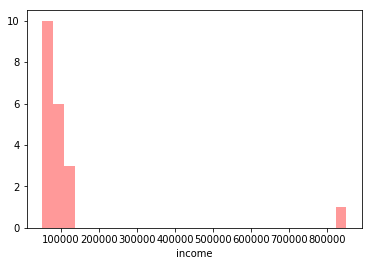

In [231]:
sns.distplot(dfi['income'],kde=False,color='red')

In [234]:
dfi.income.min()

50000

In [235]:
dfi.income.max()

850000

In [239]:
dfi.income.median()

77500.0

In [240]:
dfi.income.mean()

117500.0

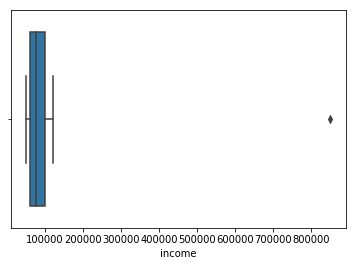

In [244]:
#using boxplot to show the outlier
sns.boxplot('income',data=dfi)

In [245]:
range=850000-50000
range
#From the box plot we can get outlier is 850000

800000

In [298]:
#Line chart is the best for this type of analysis
a=b=c=d=0;
for i in dfi['income']:
    if i<=50000:
        a=a+1;
    elif i<=75000:
        b=b+1;
    elif i<=100000:
        c=c+1;
    else:
        d=d+1;
s=[a/20,b/20,c/20,d/20]
s

[0.1, 0.4, 0.3, 0.2]

Text(0,0.5,'percentage')

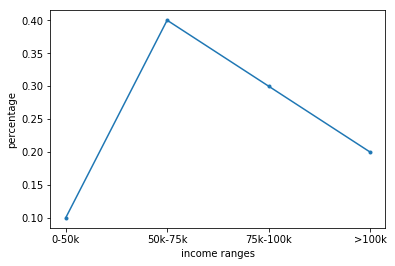

In [302]:
x=['0-50k','50k-75k','75k-100k','>100k']
plt.plot(x,s,'.-')
plt.xlabel('income ranges')
plt.ylabel('percentage')

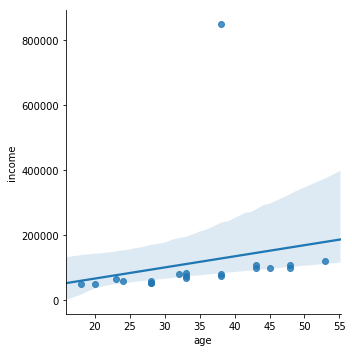

In [286]:
#using lmplot to show the relationship of income and age, we can see income increase as people get older
sns.lmplot(x='age',y='income',data=dfi)

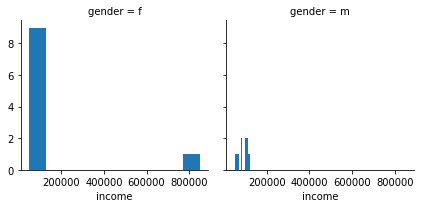

In [287]:
#use histgram to compare the income between male and female, we can see female's income are more concentrated than male's income.
g = sns.FacetGrid(data=dfi,col='gender')
g.map(plt.hist,'income')

In [306]:
#Data interpretation
#Dataset2
dfih=pd.read_csv('data-review/income_history.csv')
dfih

,id,name,gender,1990,1995,2000,2005,2010,2015
0,0,judy,f,70000,70000,72000,85000,105000,120000
1,1,jennifer,f,65000,65000,68000,80000,90000,100000
2,2,jill,f,72000,75000,75000,85000,100000,110000
3,3,jane,f,68000,70000,70000,82000,95000,110000
4,4,jessica,f,60000,60000,65000,80000,90000,105000
5,5,julia,f,65000,68000,68000,80000,95000,110000
6,6,janet,f,68000,68000,70000,85000,100000,110000
7,7,josephine,f,60000,62000,65000,85000,95000,105000
8,8,judith,f,68000,68000,70000,82000,95000,105000
9,9,juliana,f,65000,68000,68000,85000,100000,110000


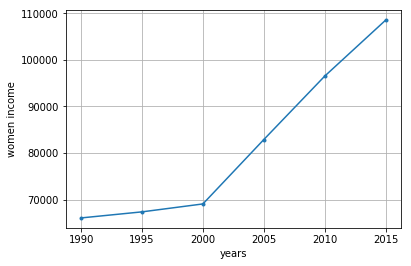

In [317]:
m1=dfih['1990'][0:10].mean()
m2=dfih['1995'][0:10].mean()
m3=dfih['2000'][0:10].mean()
m4=dfih['2005'][0:10].mean()
m5=dfih['2010'][0:10].mean()
m6=dfih['2015'][0:10].mean()
s1=[m1,m2,m3,m4,m5,m6]
x1=['1990','1995','2000','2005','2010','2015']
plt.plot(x1,s1,'.-')
plt.xlabel('years')
plt.ylabel('women income')
plt.grid()
#Conclusion: women income increased as time passed

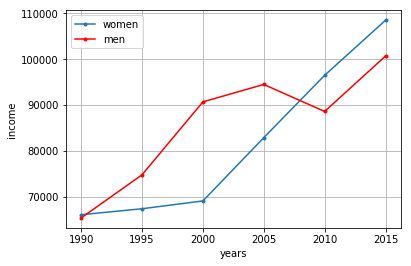

In [341]:
m1=dfih['1990'][0:10].mean()
m2=dfih['1995'][0:10].mean()
m3=dfih['2000'][0:10].mean()
m4=dfih['2005'][0:10].mean()
m5=dfih['2010'][0:10].mean()
m6=dfih['2015'][0:10].mean()
s1=[m1,m2,m3,m4,m5,m6]
x1=[[1990],[1995],[2000],[2005],[2010],[2015]]
plt.plot(x1,s1,'.-')
m11=dfih['1990'][10:20].mean()
m22=dfih['1995'][10:20].mean()
m33=dfih['2000'][10:20].mean()
m44=dfih['2005'][10:20].mean()
m55=dfih['2010'][10:20].mean()
m66=dfih['2015'][10:20].mean()
s2=[m11,m22,m33,m44,m55,m66]
plt.plot(x1,s2,'.-',color='red')
plt.xlabel('years')
plt.ylabel('income')
plt.grid()
plt.legend(['women','men'])

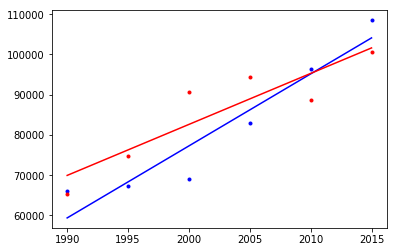

In [351]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x1,s1)
plt.plot(x1,s1,'b.')
s11=model.predict(x1)
plt.plot(x1,s11,'b-')
model1=LinearRegression()
model1.fit(x1,s2)
plt.plot(x1,s2,'r.')
s22=model1.predict(x1)
plt.plot(x1,s22,'r-')
#This is the result of linear regression for each group, the trend of income was going up during the given period.
#Based on the graph, women is more likely to have a higher yearly income by 2020